# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [ ]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [ ]:

'''Calculate index of value in domain'''
def calculate_value_index(domain, value):
  # Domain info
  min = domain[0]
  diff = round(domain[1] - domain[0], 2)
  max = min + len(domain)*diff

  if (value > max - diff) or value < min:
    v_index = None
  else:
    # Calculate value index
    v_index = round((value - min)/diff)

  return(v_index)


'''Calculate gradient, return gradient value for given index'''
def calculate_index_gradient(fun, xi, yi):
  dx,dy = np.gradient(fun, axis=(1,0))
  return dx[yi][xi], dy[yi][xi]


'''Return gradient value for given point'''
def calculate_point_gradient(fun, domain_x, x_value, domain_y, y_value):
  x_index = calculate_value_index(domain_x, x_value)
  y_index = calculate_value_index(domain_y, y_value)
  grad_x, grad_y = calculate_index_gradient(fun, x_index, y_index)
  return grad_x, grad_y



In [ ]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    x_domain = X
    Y = np.arange(-3, 2, 0.05)
    y_domain = Y
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = []  # trace of search

    '''Calculate Z value for full domain'''
    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0][0], self.trace[:,1][0], s=20)
            plt.scatter(self.trace[:,0], self.trace[:,1], s=1)

    def plot_traces(self, traces):
      for trace in traces:
        start = plt.scatter(trace[:,0][0], trace[:,1][0], s=20, c='#ff3300')
        path = plt.scatter(trace[:,0], trace[:,1], s=1, c='#ff9933')
        end = plt.scatter(trace[:,0][-1], trace[:,1][-1], s=20, c='#ffcc00')
      plt.legend((start, path, end),
          ('Initial coordinates', 'Path', 'Final coordinates'),
          bbox_to_anchor=(1.05, 1.0),
          loc='upper left')
      plt.show()

    '''Calculate Z value for given point'''
    def calculate_func_value(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    '''Calculate gradient value for given point'''
    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    '''Calculate gradient descent step for given point'''
    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        grad = self.calculate_func_grad(x1, x2)
        grad_desc_step = tuple(i*(-1)*self.alpha for i in grad)
        return grad_desc_step

    '''Minimize function'''
    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:

        current_x, current_y = x1_init, x2_init
        self.trace = [[current_x, current_y]]

        for step in range(steps):
          if verbose >= 2:
            print("current_x:", current_x, "current_y:", current_y)
            print("current_func_value:", self.calculate_func_value(current_x, current_y))

          step_x, step_y = self.gradient_descent_step(current_x, current_y)
          if verbose >= 3:
            print("step_x", step_x, "step_y", step_y)

          if self.x_domain[0] <= current_x + step_x <= self.x_domain[-1]:
            current_x += step_x
          elif verbose >=3:
            print("x out of bounds")

          if self.y_domain[0] <= current_y + step_y <= self.y_domain[-1]:
            current_y += step_y
          elif verbose >=3:
            print("y out of bounds")

          self.trace.append([current_x, current_y])

          if verbose >= 1:
            print("----------------")

        self.trace = np.array(self.trace)
        if plot:
          self.plot_func()

        if verbose >=1:
          print("current_x:", current_x, "current_y:", current_y)
        return self.calculate_func_value(current_x, current_y)


    def compare_minimizing(self, tries: int, steps: int=200, verbose:int=0):
      init_coords = []
      traces = []
      results = []
      for i in range(tries):
        if verbose >=1:
          print("---------------\ni:", i)
        x_init = round(np.random.choice(self.x_domain, 1)[0], 2)
        y_init = round(np.random.choice(self.y_domain, 1)[0], 2)
        results.append([x_init, y_init])
        result = self.minimize(x_init, y_init, steps, 0, False)
        results.append(result)
        if verbose >=1:
          print("x:", x_init, "y:", y_init, "result:", result)
        traces.append(self.trace)

      self.plot_func()
      self.plot_traces(traces)



# Testing

In [ ]:
a = SimpleGradientDescent(f_fun, f_grad_fun, 0.1)
a._calc_Z_value()

In [ ]:
a.minimize(-2,-2,20)

current_x: -1.6365000000000005 current_y: -1.6360000000000003


5.354628250000003

In [ ]:
b = SimpleGradientDescent(g_fun, g_grad_fun, 0.5)
b._calc_Z_value()

In [ ]:
b.minimize(0.5, -2,100)

current_x: 0.9343869512650167 current_y: -1.9750504818303756


0.9940103725491323

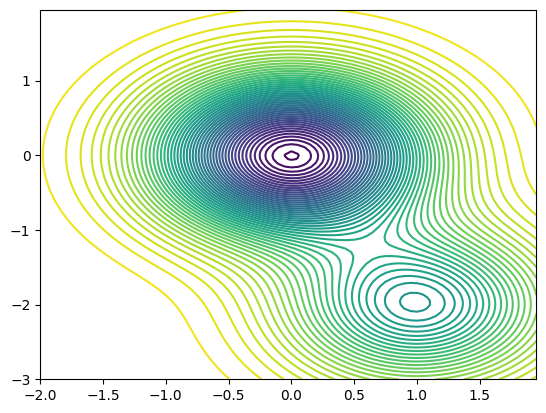

In [ ]:
x = np.arange(-2, 2, 0.05)
y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(x, y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)


In [ ]:
a = np.array([0,1,2,3,4,5,6,7])
a[-5:-1]
# np.random.choice(a, 1)[0]

array([3, 4, 5, 6])

In [ ]:
trace = np.array([[0,1],[2,3],[4,5],[6,7]])
trace[:,0], trace[:,1]
trace = np.append(trace, [[8,9]],axis=0)
trace

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

# Funkcja 1

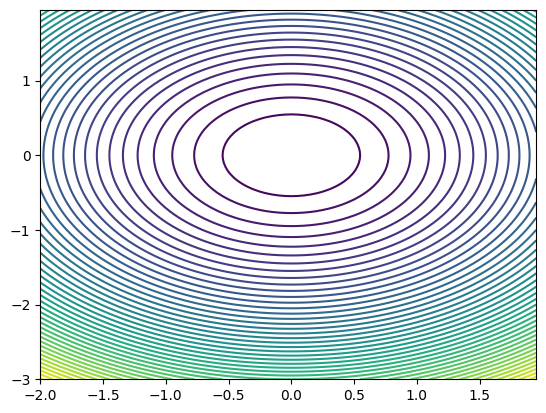

In [ ]:
# Function to analyze
x = np.arange(-2, 2, 0.05)
y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

In [ ]:
def f_fun(x, y):
  return x**2 + y**2

def f_grad_fun(x_value, y_value):
  x_domain = np.arange(-2, 2, 0.05)
  y_domain = np.arange(-3, 2, 0.05)
  X, Y = np.meshgrid(x_domain, y_domain)
  Z = f_fun(X, Y)

  grad_x, grad_y = calculate_point_gradient(Z, x_domain, x_value, y_domain, y_value)
  return grad_x, grad_y


In [ ]:
GradDescentF = SimpleGradientDescent(f_fun, f_grad_fun, 0.1)

Minimalizacja funkcji f z danym punktem początkowym

current_x: -1 current_y: 1
current_func_value: 2
----------------
current_x: -0.99 current_y: 0.9900000000000002
current_func_value: 1.9602000000000004
----------------
current_x: -0.98 current_y: 0.9800000000000004
current_func_value: 1.9208000000000007
----------------
current_x: -0.97 current_y: 0.9700000000000006
current_func_value: 1.8818000000000012
----------------
current_x: -0.9605 current_y: 0.9605000000000008
current_func_value: 1.8451205000000015
----------------
current_x: -0.9510000000000001 current_y: 0.951000000000001
current_func_value: 1.8088020000000018
----------------
current_x: -0.9415000000000001 current_y: 0.9415000000000011
current_func_value: 1.7728445000000024
----------------
current_x: -0.9320000000000002 current_y: 0.9320000000000013
current_func_value: 1.7372480000000028
----------------
current_x: -0.9225000000000002 current_y: 0.9225000000000014
current_func_value: 1.702012500000003
----------------
current_x: -0.9135000000000002 current_y: 0.9135000000

0.2671805000000119

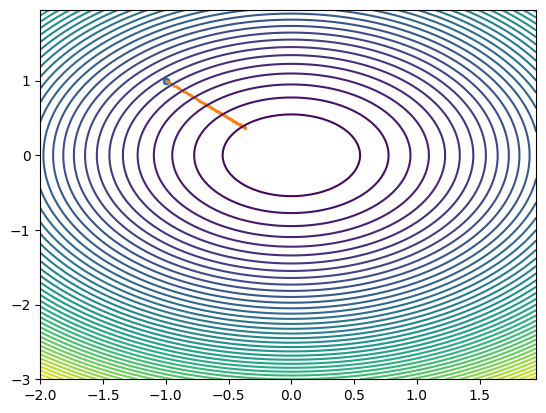

In [ ]:
GradDescentF.minimize(-1,1,100,2, True)

Porównanie minimalizacji funkcji f dla losowo wybranych punktów początkowych  
α = 0.1  
steps = 50

---------------
i: 0
x: 1.15 y: 1.7 result: 1.5422282500000166
---------------
i: 1
x: -1.6 y: -1.45 result: 1.7069402499999988
---------------
i: 2
x: 0.0 y: -1.0 result: 0.36602499999999755
---------------
i: 3
x: 1.9 y: -0.9 result: 1.6206752499999926
---------------
i: 4
x: 0.95 y: -1.35 result: 0.9981139999999953
---------------
i: 5
x: 0.4 y: -2.95 result: 3.245031250000011
---------------
i: 6
x: 1.65 y: 1.25 result: 1.5692945000000098
---------------
i: 7
x: 0.35 y: -0.3 result: 0.07770499999999775
---------------
i: 8
x: -0.55 y: -3.0 result: 3.4038738125000103
---------------
i: 9
x: 0.75 y: -2.7 result: 2.8756182500000085
---------------
i: 10
x: -0.1 y: 1.95 result: 1.3950642500000263
---------------
i: 11
x: 1.3 y: 0.9 result: 0.9163940000000051
---------------
i: 12
x: -0.85 y: -2.8 result: 3.134346250000009
---------------
i: 13
x: -1.35 y: -1.85 result: 1.917714500000002
---------------
i: 14
x: 0.65 y: -2.3 result: 2.0907212500000036
---------------
i: 15
x: -0.2 y: -2

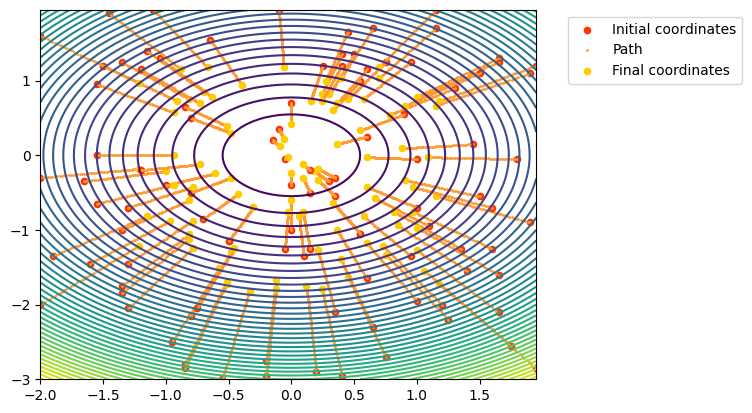

In [ ]:
GradDescentF.compare_minimizing(100,50,1)

Porównanie minimalizacji funkcji f dla losowo wybranych punktów początkowych  
α = 0.5  
steps = 50

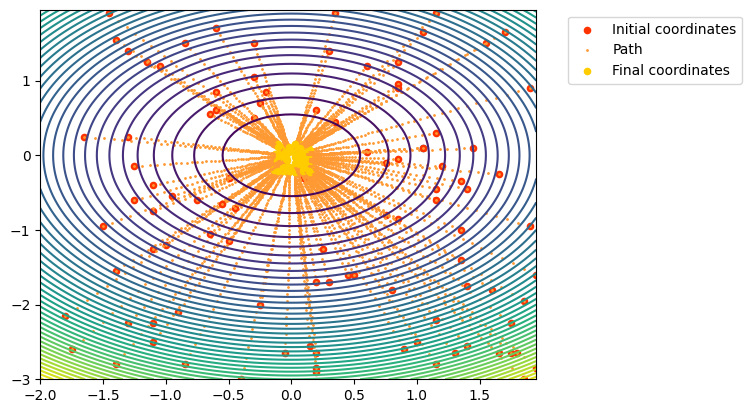

In [ ]:
GradDescentFBiggerStep = SimpleGradientDescent(f_fun, f_grad_fun, 0.5)
GradDescentFBiggerStep.compare_minimizing(100,50,0)

# Funkcja 2

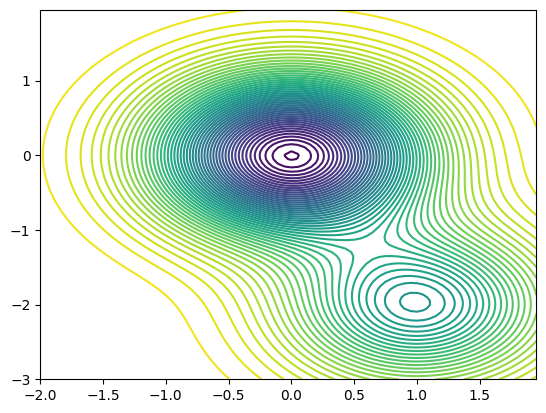

In [ ]:
x = np.arange(-2, 2, 0.05)
y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(x, y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

In [ ]:
def g_fun(x, y):
  return 1.5-np.exp(-x**(2)-y**(2))-0.5*np.exp(-(x-1)**(2)-(y+2)**(2))

def g_grad_fun(x_value, y_value):
  x_domain = np.arange(-2, 2, 0.05)
  y_domain = np.arange(-3, 2, 0.05)
  X, Y = np.meshgrid(x_domain, y_domain)
  Z = g_fun(X, Y)

  grad_x, grad_y = calculate_point_gradient(Z, x_domain, x_value, y_domain, y_value)
  return grad_x, grad_y


In [ ]:
GradDescentG = SimpleGradientDescent(g_fun, g_grad_fun, 0.5)

Minimalizacja funkcji g z danym punktem początkowym

0.49833536337963363

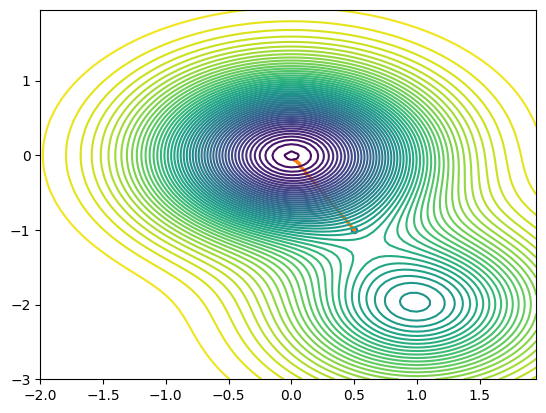

In [ ]:
GradDescentG.minimize(0.5,-1,100,0, True)

Porównanie minimalizacji funkcji g dla losowo wybranych punktów początkowych  
α = 0.5  
steps = 50

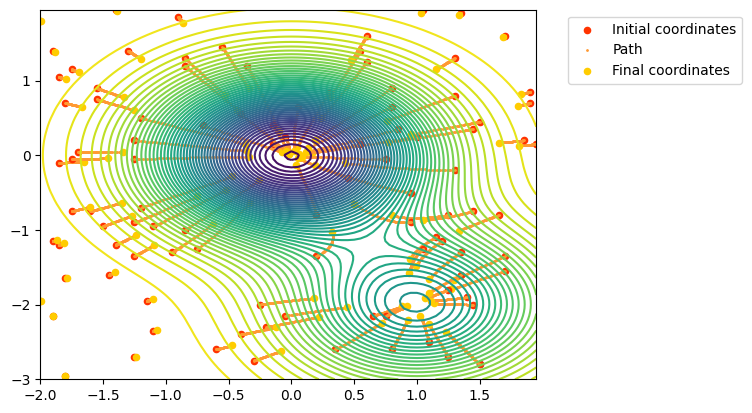

In [ ]:
GradDescentG.compare_minimizing(100,50,0)

Porównanie minimalizacji funkcji g dla losowo wybranych punktów początkowych  
α = 1  
steps = 50

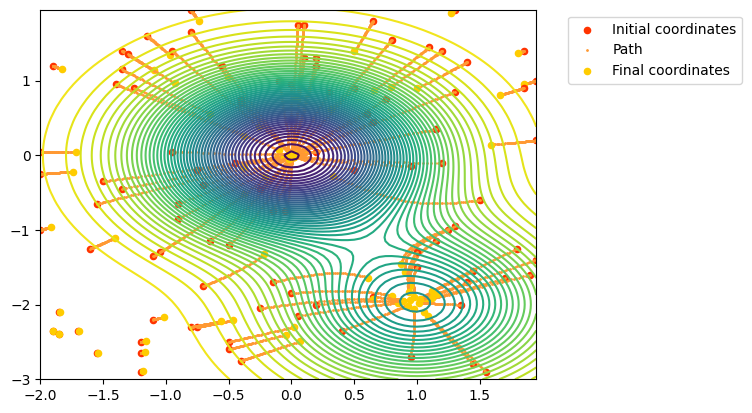

In [ ]:
GradDescentGBiggerStep = SimpleGradientDescent(g_fun, g_grad_fun, 1)
GradDescentGBiggerStep.compare_minimizing(100,50,0)